In [1]:
import numpy as np
import netCDF4 as nc
from geopy.geocoders import Nominatim
import pickle
import pandas as pd
from pypinyin import pinyin, Style
import matplotlib.pyplot as plt
import torch
from torch import nn
import random
import math
from d2l import torch as d2l
plt.rcParams['font.sans-serif'] = ['SimHei'] #黑体
plt.rcParams['axes.unicode_minus'] = False #坐标轴符号显示

cities = [
    "北京", "上海", "天津", "重庆", "哈尔滨", "长春", "沈阳", "呼和浩特", "石家庄", "太原",
    "西安", "济南", "乌鲁木齐", "拉萨", "西宁", "兰州", "银川", "郑州", "南京", "武汉",
    "杭州", "合肥", "福州", "南昌", "长沙", "贵阳", "成都", "广州", "昆明", "南宁", "深圳"
]
air_path= '/home/dahai003/毕业设计/code/data/'
datalist_path = '/home/dahai003/毕业设计/code/气候数据1979-2018/datalist'
data_path='/home/dahai003/毕业设计/code/气候数据1979-2018/Data_forcing_01dy_010deg/'
locations_path='/home/dahai003/毕业设计/code/气候数据1979-2018/my_list.pkl'

# 数据处理

## 获取城市经纬度

In [2]:
def get_coordinates(city_name):
    # 创建一个Nominatim地理编码器
    geolocator = Nominatim(user_agent="try")

    # 通过城市名获取位置信息
    location = geolocator.geocode(city_name)

    # 如果找到了位置信息，返回经纬度
    if location:
        return location.latitude, location.longitude
    else:
        return None

## 将经纬度转化出来并进行持久化存储

    

In [4]:
locations = []

for city_name in cities:
    for i in range(5):
        try:
            coordinates = get_coordinates(city_name)
            print(f'{city_name}成功')
            break
        except Exception as e:
            print('f{city_name}获取失败')
    locations.append(coordinates)
print(locations)
with open(locations_path, 'wb') as file:
    # 使用pickle.dump()将列表写入文件
    pickle.dump(locations, file)

北京成功
上海成功
天津成功
重庆成功
哈尔滨成功
长春成功
沈阳成功
呼和浩特成功
石家庄成功
太原成功
西安成功
济南成功
乌鲁木齐成功
拉萨成功
西宁成功
兰州成功
银川成功
郑州成功
南京成功
武汉成功
杭州成功
合肥成功
福州成功
南昌成功
长沙成功
贵阳成功
成都成功
广州成功
昆明成功
南宁成功
深圳成功
[(40.190632, 116.412144), (31.2312707, 121.4700152), (39.3032619, 117.4163641), (30.05518, 107.8748712), (45.7593633, 126.6276177), (43.9088384, 125.3177297), (41.8026095, 123.4279105), (40.8304267, 111.6587169), (38.0429742, 114.5088385), (37.870009, 112.5452739), (34.261004, 108.9423363), (36.6705337, 116.985375), (43.419754, 87.319461), (29.6553895, 91.1704736), (36.824463, 101.440811), (36.474436, 103.733224), (38.4852037, 106.2261926), (34.7533392, 113.6599983), (32.0438284, 118.7788631), (30.5951051, 114.2999353), (30.2489634, 120.2052342), (31.8665676, 117.281428), (21.9842196, 111.2062957), (28.6472124, 116.0348483), (28.1450774, 113.2384362), (26.559901, 106.6987409), (30.7001324, 104.0708278), (23.1301964, 113.2592945), (25.0363006, 102.7086139), (22.8193063, 108.3627211), (22.5445741, 114.0545429)]


# 加载气候数据将其转化为dataframe

In [ ]:
datalist_path = '/home/dahai003/毕业设计/code/气候数据1979-2018/datalist'
data_path='/home/dahai003/毕业设计/code/气候数据1979-2018/Data_forcing_01dy_010deg/'
locations_path='/home/dahai003/毕业设计/code/气候数据1979-2018/my_list.pkl'

from netCDF4 import num2date

dataset = pd.DataFrame(columns=['Type', 'Time', 'City', 'Data'])
with open(locations_path,'rb') as file:
    locations = pickle.load(file)
city2Lcations = list(zip(cities,locations))
#print(city2Lcations)


with open(datalist_path) as n:
    names = n.readlines()
#     print(name)
    for i in names:
        i = i.rstrip('\n')
        features = i.rstrip('.nc.gz').split('_')
        file_obj = nc.Dataset(data_path+i.rstrip('\n'))
        time_var = file_obj.variables['time']

        # 获取时间变量的单位，例如“天自1970-01-01”
        time_unit = time_var.units

        # 使用num2date将时间变量转换为实际的日期
        dates = num2date(time_var[:], units=time_unit)
        lats = file_obj.variables['lat'][:]
        lons = file_obj.variables['lon'][:]
        
        for city2Lcation in city2Lcations:
            target_lat = city2Lcation[1][0]
            target_lon = city2Lcation[1][1]

            lat_index = np.abs(lats - target_lat).argmin()
            lon_index = np.abs(lons - target_lon).argmin()
            # 读取目标经纬度对应的数据
            lrad_data = file_obj.variables[features[0]][:, lat_index, lon_index]
            datas =  list(zip(dates,np.array(lrad_data)))
#             print(np.array(lrad_data))
#             print(lrad_data)
            for data in datas:
                formatted_date = data[0].strftime('%Y/%m/%d')
        
                data_dict = {'Type': features[0],
                             'Time': formatted_date,
                             'City': city2Lcation[0],
                             'Data': data[1]}
            #print(f'type:{fatures[0]},time:{fatures[6]},city:{city2Lcation[0]}',lrad_data)
                
                dataset = dataset.append(data_dict, ignore_index=True)
            print(data_dict)
print(dataset)

## 保存转化结果

In [ ]:
city_order = ["北京", "上海", "天津", "重庆", "哈尔滨", "长春", "沈阳", "呼和浩特", "石家庄", "太原",
              "西安", "济南", "乌鲁木齐", "拉萨", "西宁", "兰州", "银川", "郑州", "南京", "武汉",
              "杭州", "合肥", "福州", "南昌", "长沙", "贵阳", "成都", "广州", "昆明", "南宁", "深圳"]

# 按照城市排序顺序重新排序
dataset['City'] = pd.Categorical(dataset['City'], categories=city_order, ordered=True)
dataset.sort_values(by=['City', 'Time', 'Type'], inplace=True)
print(dataset)
# 将重新排序后的DataFrame保存到CSV文件中
dataset.to_csv('/home/dahai003/毕业设计/code/气候数据1979-2018/sorted_dataset.csv', index=False)

print("Dataset saved to 'sorted_dataset.csv'")

# 将空气质量和气候信息合并

In [5]:
pinyin_cities = [pinyin(city, style=Style.NORMAL) for city in cities]
s=''
pinyin_cities_str=[]
for pinyin_citie in pinyin_cities:
    for i in pinyin_citie:
        s+=i[0]
    pinyin_cities_str.append(s)
    s=''
# c=input()
# y=input()
# m=input()
print(pinyin_cities_str)

['beijing', 'shanghai', 'tianjin', 'chongqing', 'haerbin', 'changchun', 'shenyang', 'huhehaote', 'shijiazhuang', 'taiyuan', 'xian', 'jinan', 'wulumuqi', 'lasa', 'xining', 'lanzhou', 'yinchuan', 'zhengzhou', 'nanjing', 'wuhan', 'hangzhou', 'hefei', 'fuzhou', 'nanchang', 'changsha', 'guiyang', 'chengdu', 'guangzhou', 'kunming', 'nanning', 'shenzhen']


In [ ]:
air_path= '/home/dahai003/毕业设计/code/data/'
city2pinyiin = list(zip(cities,pinyin_cities_str))
# 将 'City' 列的数据类型转换为字符串
dataset['City'] = dataset['City'].astype(str)
dataset['Type'] = dataset['Type'].astype(str)
# 将 'Data' 列的数据类型转换为整数
dataset['Time'] = pd.to_datetime(dataset['Time'])
df = pd.read_csv('/home/dahai003/毕业设计/code/data/2014-2018上海-空气质量.csv')
df['日期'] = pd.to_datetime(df['日期'])
df['City'] = '上海'

for city in cities:
    df = pd.read_csv(f'{air_path}2014-2018{city}-空气质量.csv')
    df['日期'] = pd.to_datetime(df['日期'])
    df.rename(columns={'日期': 'Time'}, inplace=True)
    df['City'] = city
    df['City'] = df['City'].astype(str)
    merged_df = pd.merge(dataset, df, left_on=['City', 'Time'], right_on=['City', 'Time'], how='inner')
    pivoted_df = merged_df.pivot_table(index=['Time', 'City','质量等级', '当天AQI排名', 'AQI指数', 'PM2.5', 'PM10', 'So2', 'No2', 'Co', 'O3'],
                                   columns='Type',
                                   values='Data',
                                   aggfunc='first').reset_index()
    
    pivoted_df.to_csv(f'{air_path}2014-2018{city}-空气质量-气候.csv', index=False)
# 重命名列名以消除层次结构
    pivoted_df.columns.name = None  # 删除列的名称
    pivoted_df = pivoted_df.reset_index()  # 重置索引，将多级索引变为列

# 查看结果
print(pivoted_df.head())
    



# 数据展示

In [3]:
df = pd.read_csv('/home/dahai003/毕业设计/code/data/2014-2018上海-空气质量-气候.csv')
print(df.shape)

(1808, 18)


In [4]:
df.drop(['Time', 'City','质量等级', '当天AQI排名'], axis=1, inplace=True)
df

,AQI指数,PM2.5,PM10,So2,No2,Co,O3,lrad,prec,pres,shum,srad,temp,wind
0,168,144,179,61,99,1.71,27,294.75,0.00,101344.0,0.002749,85.50,280.839996,1.617996
1,166,111,129,36,93,1.49,31,314.25,0.00,101344.0,0.004660,90.75,284.609985,1.617996
2,182,142,163,55,95,1.41,25,320.75,0.00,101344.0,0.004088,72.75,283.880005,2.243996
3,144,113,123,36,62,1.19,23,319.50,0.00,101344.0,0.004108,37.50,278.820007,2.081997
4,64,46,59,24,63,0.99,17,301.50,0.00,101344.0,0.003874,68.25,279.149994,1.635998
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1803,60,41,57,6,77,0.79,11,358.50,0.00,101962.0,0.008599,31.50,285.519989,2.247997
1804,45,25,44,6,23,0.53,52,232.25,0.00,103650.0,0.002083,124.75,273.190002,6.059998
1805,49,31,49,8,37,0.72,36,292.50,0.00,103730.0,0.002385,42.50,274.239990,4.757996
1806,42,28,40,7,40,0.64,33,298.25,0.02,103716.0,0.003244,37.50,274.419983,3.875996


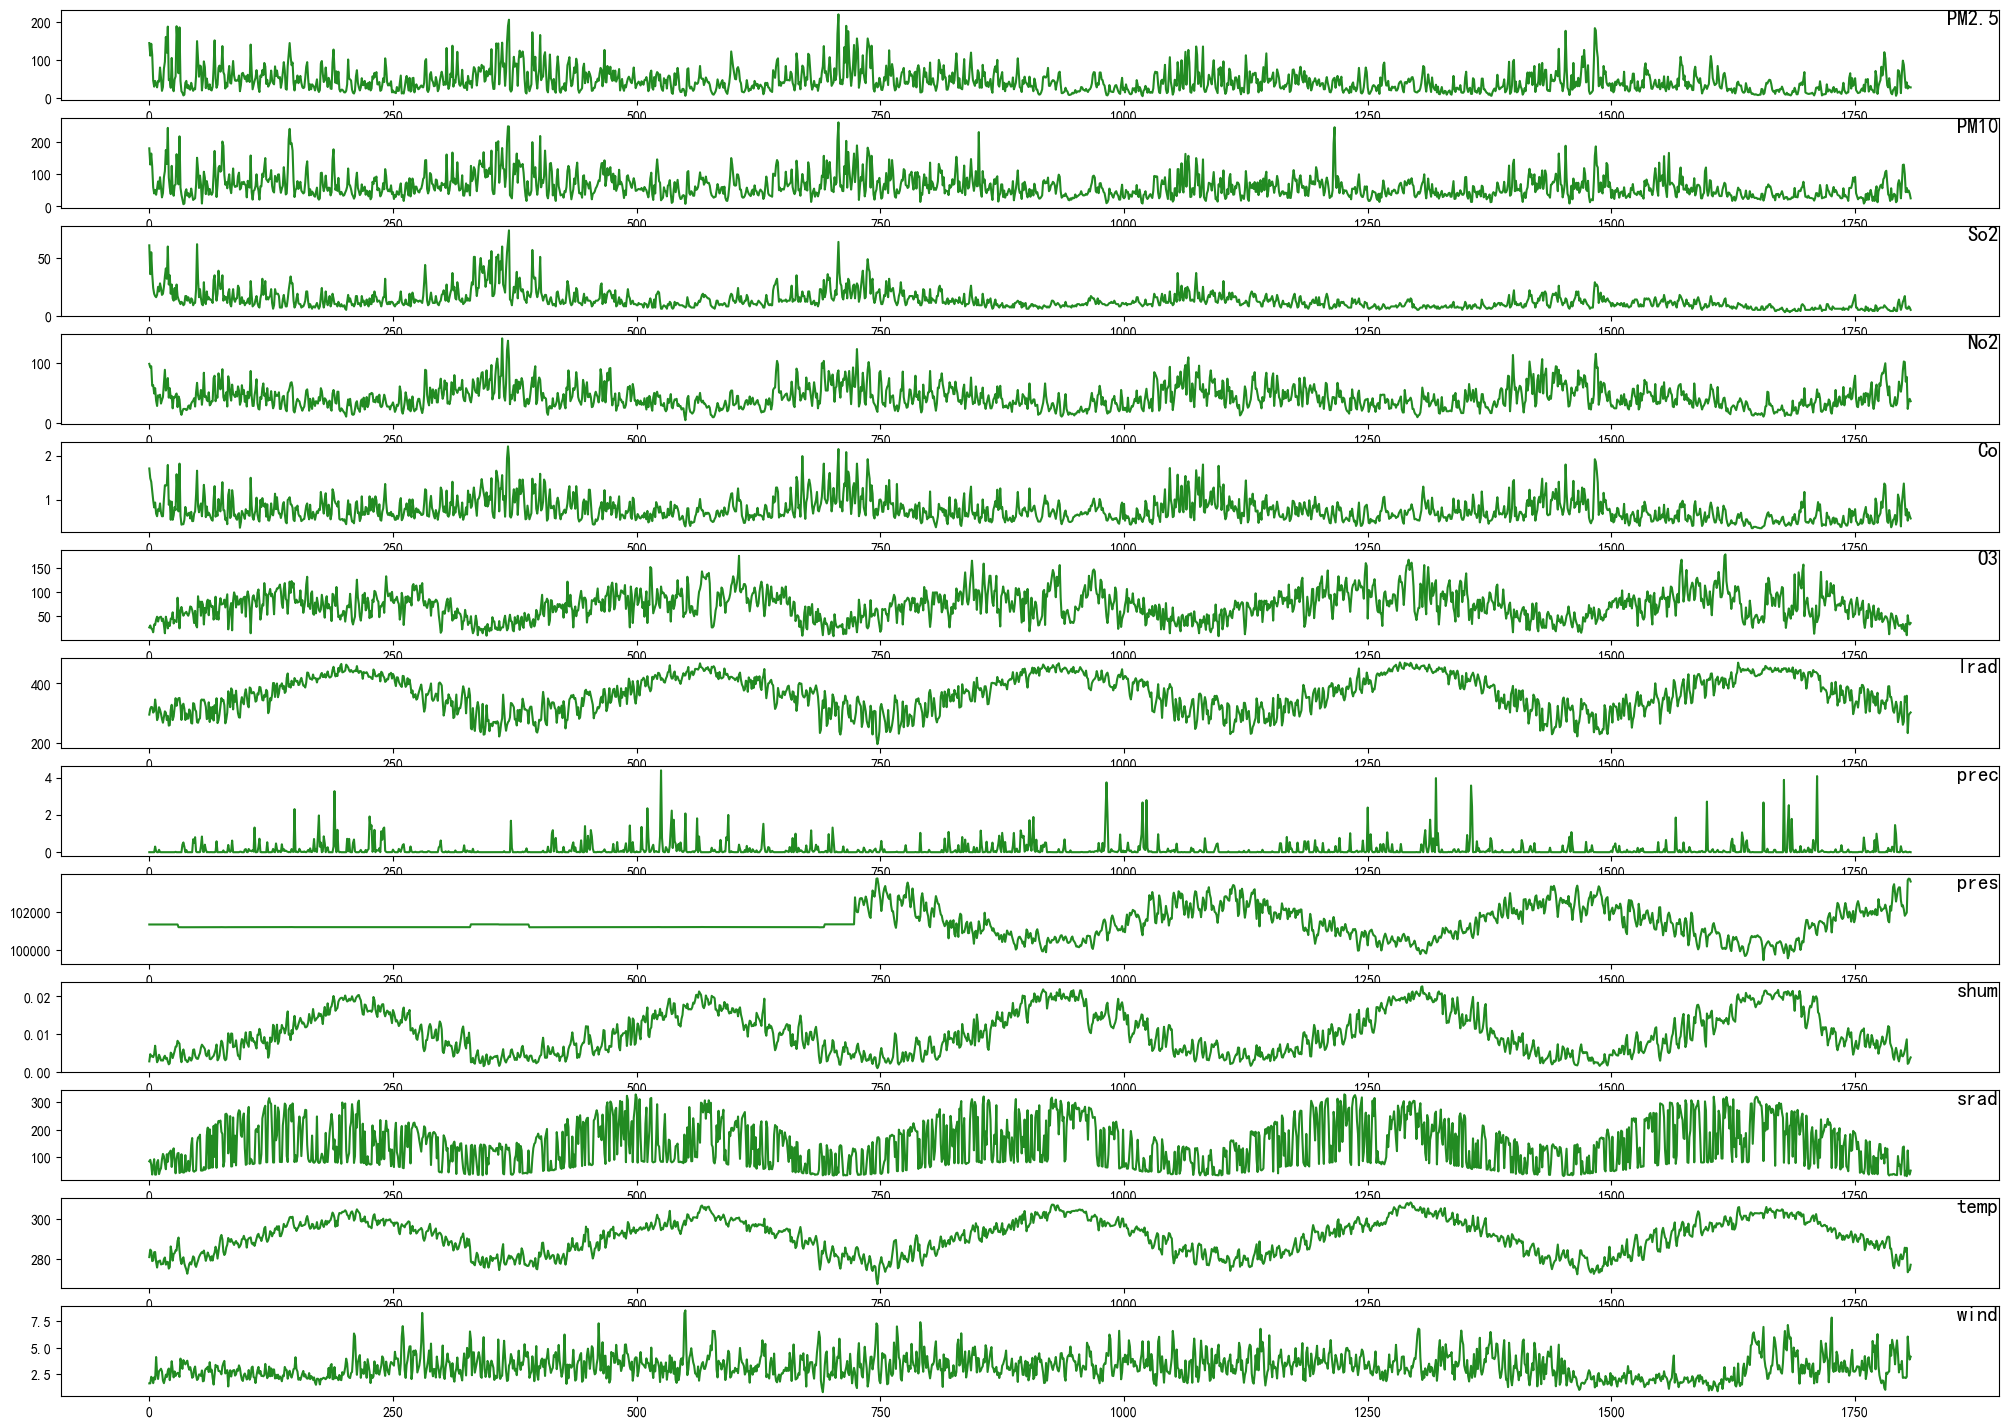

In [5]:
values = df.values
n=values.shape[1]-1
plt.figure(figsize=(25,18))
for group  in range(n):
    plt.subplot(n, 1, group+1)
    plt.plot(values[:,group+1],c='forestgreen')
    plt.title(df.columns[group+1] ,y=0.75,loc='right',fontsize= 15)
plt.savefig(f'{air_path}各指标折线图.svg')
plt.show()


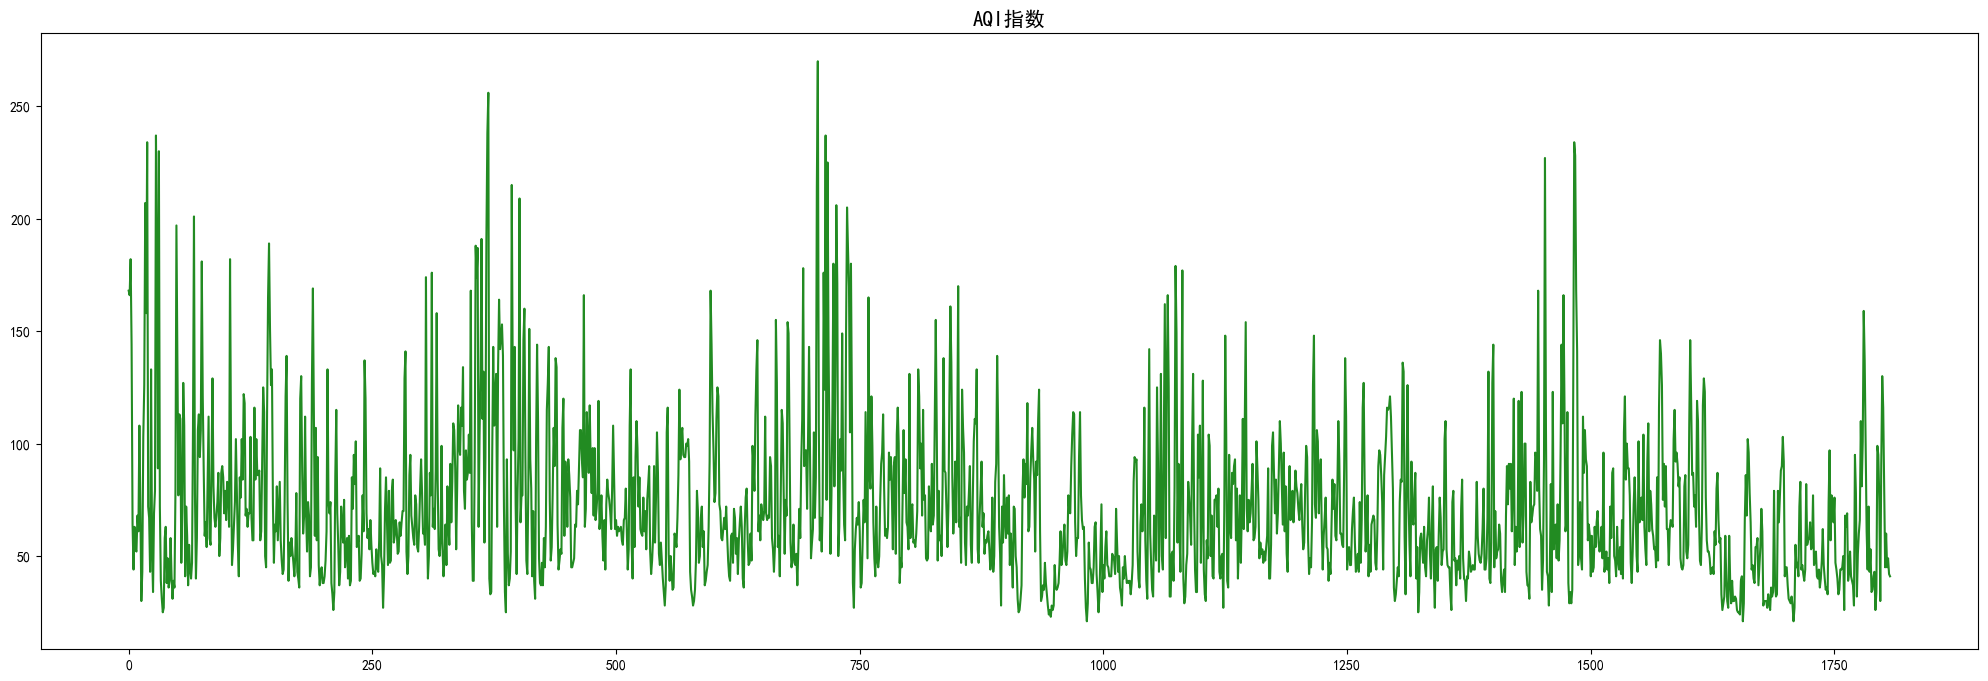

In [6]:
plt.figure(figsize=(25,8))
plt.plot(values[:,0],c='forestgreen')
plt.title(df.columns[0] ,fontsize= 15)
plt.savefig(f'{air_path}AQI折线图.svg')
plt.show()

# 归一化处理
Z得分归一化（Z-Score Normalization）的公式如下：

$$
Z = \frac{X - \mu}{\sigma}
$$
其中：
- $Z$ 是归一化后的得分。
- $X$ 是原始数据值。
- $\mu$ 是原始数据的均值（平均值）。
- $\sigma$ 是原始数据的标准差。

In [7]:
def z_score_normalize(data):
        # 计算均值和标准差
    data_mean = data.mean(axis=0)
    data_std = data.std(axis=0)
    # 执行Z得分归一化
    data_standardized = (data - data_mean) / data_std
    return data_standardized


In [8]:
test =np.array([[1,2,3],[2,3,4]])
z_score_normalize(test)


array([[-1., -1., -1.],
       [ 1.,  1.,  1.]])

In [9]:
def load_data(file_path):
    df = pd.read_csv(file_path)
    df.drop(['Time', 'City','质量等级', '当天AQI排名','pres'], axis=1, inplace=True)
    values = df.values
    dataset = values[:,1:]
    dataset = z_score_normalize(dataset)
    data_train = dataset[:-120]
    data_test = dataset[-120:]
    return data_train, data_test, dataset.shape[1]

In [10]:
load_data('/home/dahai003/毕业设计/code/data/2014-2018济南-空气质量-气候.csv')

(array([[-0.06350408,  0.81097737,  3.14579597, ..., -0.59696066,
         -0.9382233 , -0.05640051],
        [ 0.5272777 ,  1.25643412,  3.49251431, ..., -0.6030033 ,
         -0.77241519, -0.87914472],
        [ 1.70884128,  2.18665262,  4.24899068, ..., -1.08943525,
         -1.1772934 ,  0.17405069],
        ...,
        [-1.3265548 , -1.65213641, -1.07786377, ...,  0.36381797,
          0.85867403, -0.66376992],
        [-0.77651659, -1.03635796, -0.95178437, ...,  0.81701544,
          1.15462272, -0.49792541],
        [-0.0431323 , -0.43368119, -0.88874468, ..., -0.86283651,
          0.92326038, -1.06221822]]),
 array([[-0.87837552, -0.99705296, -0.85722483, ...,  0.82305807,
          0.93000908, -0.56254032],
        [-1.08209337, -0.99705296, -0.98330422, ...,  1.32157529,
          1.15654966, -0.31270342],
        [-1.02097802, -0.76122291, -0.92026452, ...,  1.22187185,
          1.20764154, -0.24162661],
        ...,
        [-0.73577302, -0.63020622, -0.3213874 , ..., -

In [11]:
# def load_data(values):
#     dataset = torch.tensor(values[:,1:])
#     for i in range(dataset.shape[1]):
#         dataset[:,i] = z_score_normalize(dataset[:,i])
#     return dataset

In [12]:
# dataset = load_data(values)
# dataset.shape


In [13]:
def seq_data_iter_random(corpus, batch_size, num_steps):  #@save
    """使用随机抽样生成一个小批量子序列"""
    # 从随机偏移量开始对序列进行分区，随机范围包括num_steps-1
    corpus = corpus[random.randint(0, num_steps - 1)]
    # 减去1，是因为我们需要考虑标签
    num_subseqs = (len(corpus) - 1) // num_steps
    # 长度为num_steps的子序列的起始索引
    initial_indices = list(range(0, num_subseqs * num_steps, num_steps))
    # 在随机抽样的迭代过程中，
    # 来自两个相邻的、随机的、小批量中的子序列不一定在原始序列上相邻
    random.shuffle(initial_indices)

    def data(pos):
        # 返回从pos位置开始的长度为num_steps的序列
        return corpus[pos: pos + num_steps]

    num_batches = num_subseqs // batch_size
    for i in range(0, batch_size * num_batches, batch_size):
        # 在这里，initial_indices包含子序列的随机起始索引
        initial_indices_per_batch = initial_indices[i: i + batch_size]
        X = [data(j) for j in initial_indices_per_batch]
        Y = [data(j + 1) for j in initial_indices_per_batch]
        yield torch.tensor(X), torch.tensor(Y)


In [14]:
def seq_data_iter_sequential(corpus, batch_size, num_steps):  #@save
    """使用顺序分区生成一个小批量子序列"""
    # 从随机偏移量开始划分序列
    offset = random.randint(0, num_steps)
    num_tokens = ((len(corpus) - offset - 1) // batch_size) * batch_size
    Xs = torch.tensor(corpus[offset: offset + num_tokens])
    Ys = torch.tensor(corpus[offset + 1: offset + 1 + num_tokens])
    elemsize = Xs.shape[1]
    Xs, Ys = Xs.reshape(batch_size, -1), Ys.reshape(batch_size, -1)
    num_batches = Xs.shape[1] // (num_steps*elemsize)
    for i in range(0, num_steps*elemsize * num_batches, num_steps*elemsize):
        X = Xs[:, i: i + num_steps*elemsize].reshape(batch_size,num_steps,elemsize)
        Y = Ys[:, i: i + num_steps*elemsize].reshape(batch_size,num_steps,elemsize)
        yield X, Y

In [15]:
class SeqDataLoader:  #@save
    """加载序列数据的迭代器"""
    def __init__(self, batch_size, num_steps, use_random_iter,file_path):
        if use_random_iter:
            self.data_iter_fn = seq_data_iter_random
        else:
            self.data_iter_fn = seq_data_iter_sequential
        self.corpus, self.test, self.dimension = load_data(file_path)
        self.batch_size, self.num_steps = batch_size, num_steps

    def __iter__(self):
        return self.data_iter_fn(self.corpus, self.batch_size, self.num_steps)

In [16]:
def load_data_air_quality(batch_size, num_steps,  #@save
                           use_random_iter=False, 
                          file_path='/home/dahai003/毕业设计/code/data/2014-2018济南-空气质量-气候.csv'):
    """返回空气质量数据集的迭代器"""
    data_iter = SeqDataLoader(
        batch_size, num_steps, use_random_iter, file_path)
    return data_iter, data_iter.test, data_iter.dimension

In [17]:
def train_epoch(net, train_iter, loss, updater, device, use_random_iter,flag):
    """训练网络一个迭代周期（定义见第8章）"""
    state, timer = None, d2l.Timer()
    metric = d2l.Accumulator(2)  # 训练损失之和,词元数量
    for X, Y in train_iter:
        if state is None or use_random_iter:
            # 在第一次迭代或使用随机抽样时初始化state
            state = net.begin_state(batch_size=X.shape[0], device=device)
        else:
            if isinstance(net, nn.Module) and not isinstance(state, tuple):
                # state对于nn.GRU是个张量
                state.detach_()
            else:
                # state对于nn.LSTM或对于我们从零开始实现的模型是个张量
                for s in state:
                    s.detach_()
        
        y = torch.transpose(Y, 0, 1)
        y= y.reshape(-1,Y.shape[2])
        y.to(torch.float32)
        X, y = X.to(device), y.to(device)
        y_hat, state = net(X, state)
#         print(y.shape)
#         print(y_hat.shape)
        y_hat = y_hat.float()

# 确保目标 y 也是 Float 类型
        y = y.float()
        l = loss(y_hat, y).mean()
        if isinstance(updater, torch.optim.Optimizer):
            updater.zero_grad()
            l.backward()
            d2l.grad_clipping(net, 1)
            updater.step()
        else:
            l.backward()
            grad_clipping(net, 1)
            # 因为已经调用了mean函数
            updater(batch_size=1)
       # print(l * y.numel(), y.numel())
        metric.add(l * y.numel(), y.numel())
    return math.exp(metric[0] / metric[1]), metric[1] / timer.stop()
   # return metric[1], metric[1] / timer.stop()

In [18]:
def train(net, train_iter, vocab, lr, num_epochs, device,
              use_random_iter=False, flag=True,city= 'train'):
    """训练模型（定义见第8章）"""
    loss = nn.MSELoss()
    animator = d2l.Animator(xlabel='epoch', ylabel='exp(loss)',
                            legend=[city], xlim=[10, num_epochs])
    delta_loss ,a,b,count= 10000,0,0,0
    # 初始化
    if isinstance(net, nn.Module):
        updater = torch.optim.SGD(net.parameters(), lr)
    else:
        updater = lambda batch_size: d2l.sgd(net.params, lr, batch_size)
    # 训练和预测
    for epoch in range(num_epochs):
        if delta_loss < 0.1 and count > 6 and ppl <1.15:
            continue
        elif delta_loss < 0.0001 and ppl <1.2:
            count+=1
            
        ppl, speed = train_epoch(
            net, train_iter, loss, updater, device, use_random_iter,flag)
        if (epoch + 1) % 2 == 0:
            animator.add(epoch + 1, [ppl])
        
        if (epoch + 1) % 2 == 0:
            a = ppl
        else:
            b = ppl
        delta_loss = abs(a-b)
        
            
    print(f'loss {ppl:.1f}, {speed:.1f} 梯度次数/秒 {str(device)}')


In [19]:
class RNNModel(nn.Module):
    """循环神经网络模型"""
    def __init__(self, rnn_layer, vocab_size, **kwargs):
        super(RNNModel, self).__init__(**kwargs)
        self.rnn = rnn_layer
        self.vocab_size = vocab_size
        self.num_hiddens = self.rnn.hidden_size
        # 如果RNN是双向的（之后将介绍），num_directions应该是2，否则应该是1
        if not self.rnn.bidirectional:
            self.num_directions = 1
            self.linear1 = nn.Linear(self.num_hiddens, 256)
            self.linear2 = nn.Linear(256,self.vocab_size)
#             self.linear3 = nn.Linear(256,self.vocab_size)
        else:
            self.num_directions = 2
            self.linear = nn.Linear(self.num_hiddens * 2, self.vocab_size)

    def forward(self, inputs, state):
        X = torch.transpose(inputs, 0, 1)
        X = X.to(torch.float32)
        #print(X.shape)
        Y, state = self.rnn(X, state)
        # 全连接层首先将Y的形状改为(时间步数*批量大小,隐藏单元数)
        # 它的输出形状是(时间步数*批量大小,词表大小)。
        output__ = self.linear1(Y.reshape((-1, Y.shape[-1])))
        output = self.linear2(output__)
#         output = self.linear3(output_)
        return output, state

    def begin_state(self, device, batch_size=1):
        if not isinstance(self.rnn, nn.LSTM):
            # nn.GRU以张量作为隐状态
            return  torch.zeros((self.num_directions * self.rnn.num_layers,
                                 batch_size, self.num_hiddens),
                                device=device)
        else:
            # nn.LSTM以元组作为隐状态
            return (torch.zeros((
                self.num_directions * self.rnn.num_layers,
                batch_size, self.num_hiddens), device=device),
                    torch.zeros((
                        self.num_directions * self.rnn.num_layers,
                        batch_size, self.num_hiddens), device=device))

# 模型训练

In [23]:
file_path = '/home/dahai003/毕业设计/code/data/2014-2018北京-空气质量-气候.csv' #使用北京数据集对模型进行验证
num_epochs, lr = 6000, 1 #设置训练周期和学习率

batch_size, num_steps = 8, 15  #batch大小和步数
num_hiddens,num_layers, device = 256, 6,d2l.try_gpu() #隐藏层大小 隐藏层层数 尝试使用GPU若失败则使用CPU

#通过数据加载模块生成空气质量数据集的迭代器 验证数据集 数据维度
train_iter,test, dimension = load_data_air_quality(batch_size, num_steps,file_path=file_path)

#构建通过上述的超参数模型框架
num_inputs = dimension
lstm_layer = nn.LSTM(num_inputs, num_hiddens,num_layers)
model = RNNModel(lstm_layer, dimension)
model = model.to(device) #尝试将模型载入GPU


In [ ]:
train(model, train_iter, dimension, lr, num_epochs, device)

# 模型保存

In [371]:
# torch.save(model.state_dict(), '/home/dahai003/毕业设计/code/model/mlp.params')

# 模型加载

In [37]:
clone = RNNModel(lstm_layer, dimension)
clone.load_state_dict(torch.load('/home/dahai003/毕业设计/code/model/mlp.params'))
clone.eval()
clone.to(device)

RNNModel(
  (rnn): LSTM(12, 256, num_layers=6)
  (linear1): Linear(in_features=256, out_features=256, bias=True)
  (linear2): Linear(in_features=256, out_features=12, bias=True)
)

In [38]:
def predict(prefix, num_preds, net, vocab, device):  #@save
    state = net.begin_state(batch_size=1, device=device)

    outputs=prefix[0]
    outputs = outputs.reshape(1,1,-1)
    get_input = lambda: torch.tensor([outputs[-1]], device=device)
    for y in prefix[1:]:  # 预热期
        _, state = net(get_input(), state)
        outputs = np.concatenate((outputs, y.reshape(1,1,-1)), axis=0)
        #print(outputs.shape,get_input(),'=====================')
    for _ in range(num_preds):  # 预测num_preds步
        y, state = net(get_input(), state)
        outputs = np.concatenate((outputs, y.reshape(1,1,-1).cpu().detach().numpy()), axis=0)
        #print(outputs.shape,get_input(),'=====================')
    return  outputs


print(test.shape)
offset = random.randint(0,90)
data30 = test[offset:offset+30] #去若干天后的15天数据作为已知值
prefix = data30[:-15]
print(prefix.shape)
y = data30[:]

y_predict= predict(prefix,15,clone,dimension,d2l.try_gpu())
y_predict = y_predict[:].reshape(-1,dimension)



(120, 12)
(15, 12)


0.2784167789105828
0.1451970515146679
0.07935593521463231
0.16062391155274436
0.12427919760873407
0.0037025630040145334


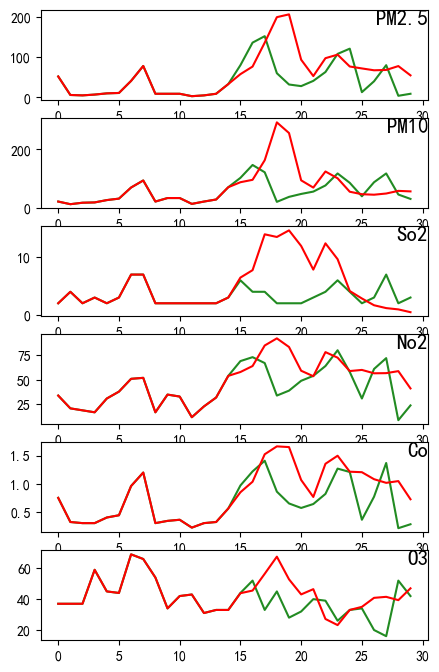

In [39]:
def convert(file_path,y_predict):
    df = pd.read_csv(file_path)
    df.drop(['Time', 'City','质量等级', '当天AQI排名','pres'], axis=1, inplace=True)
    values = df.values
    dataset = values[:,1:]
    data_mean = dataset.mean(axis=0)
    data_std = dataset.std(axis=0)
    convert_data = y_predict*data_std+data_mean
    return convert_data




y_predict_c = convert(file_path,y_predict)
y_c = convert(file_path,y)
 # 设置画布大小
plt.figure(figsize=(5,18))
time_steps = np.arange(15)
for i in range(6):
    plt.subplot(13,1 , i+1)  # 创建子图
    plt.plot(y_c[:, i],c='forestgreen')
    plt.plot(y_predict_c[:, i],c='red')
    plt.title(df.columns[i+1] ,y=0.75,loc='right',fontsize= 15)
    print(abs((y_predict_c[15][i] -y_c[15][i])/y_c[15][i]))

plt.show()

In [369]:
m =nn.MSELoss()
count =0
for j in range(6):
    for i in range(100):
        offset = random.randint(0,90)
        data30 = test[offset:offset+30] #去若干天后的15天数据作为已知值
        prefix = data30[:-15]
        y = data30[:]

        y_predict= predict(prefix,15,model,dimension,d2l.try_gpu())
        y_predict = y_predict[:].reshape(-1,dimension)
        y_predict_c = convert(file_path,y_predict)
        y_c = convert(file_path,y)

        if abs((y_predict_c[15][j] -y_c[15][j])/y_c[15][j]).sum() <0.45:
            count +=1
    print(count/60)
    count = 0

0.3333333333333333
0.5166666666666667
0.4166666666666667
0.75
0.48333333333333334
0.7


In [251]:
count =0
for j in range(6):
    for i in range(100):
        offset = random.randint(0,90)
        data30 = test[offset:offset+30] #去若干天后的15天数据作为已知值
        prefix = data30[:-15]
        y = data30[:]

        y_predict= predict(prefix,15,model,dimension,d2l.try_gpu())
        y_predict = y_predict[:].reshape(-1,dimension)
        y_predict_c = convert(file_path,y_predict)
        y_c = convert(file_path,y)
        count += np.sqrt(np.mean((y_c[15][j] - y_predict_c[15][j]) ** 2))


    print(count/100)
    count = 0
#     if np.sqrt(np.mean((y_c - y_predict_c) ** 2)) <0.45:
#         count +=1
# print(count/100)

35.47276042510161
37.54195616194863
2.7714919183732714
20.483867667624295
0.4082861542826038
14.412767270618678


# 遍历主要城市查看最确率


loss 1.1, 223326.8 梯度次数/秒 cuda:0


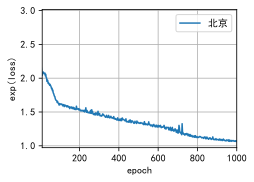

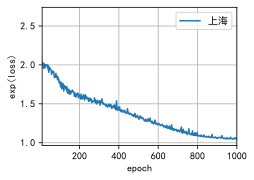

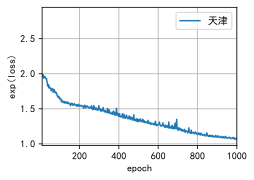

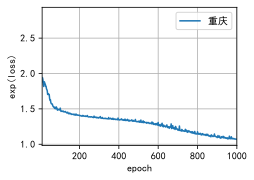

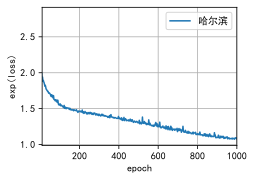

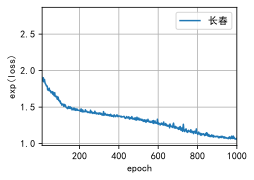

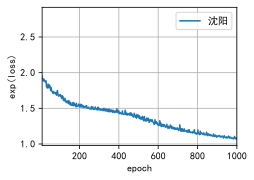

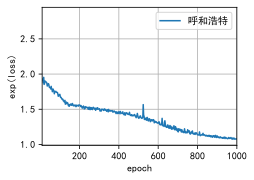

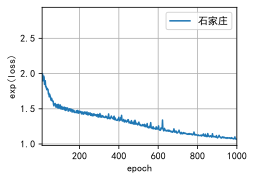

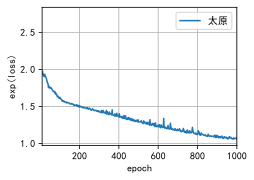

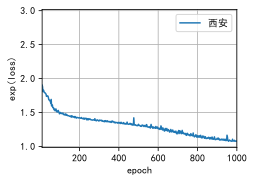

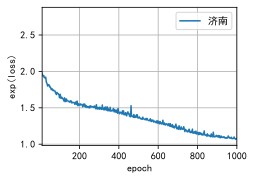

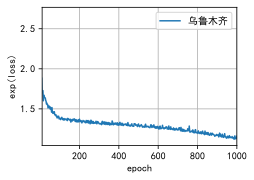

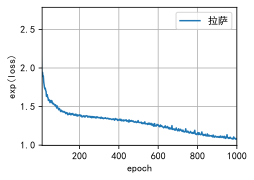

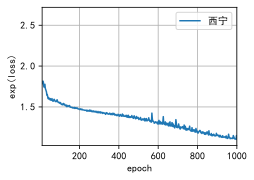

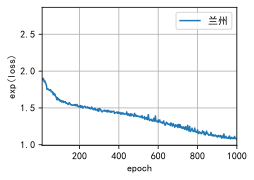

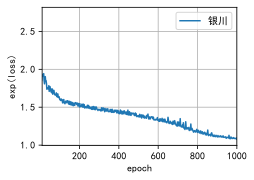

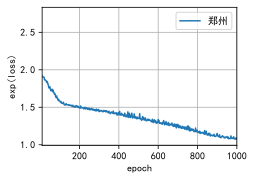

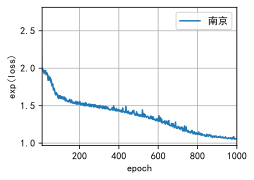

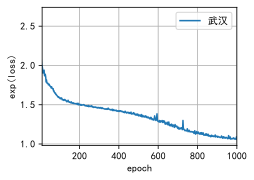

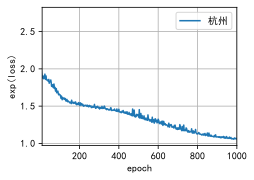

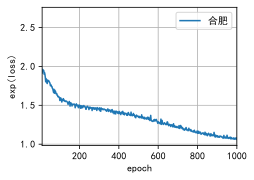

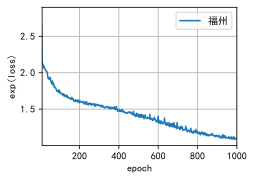

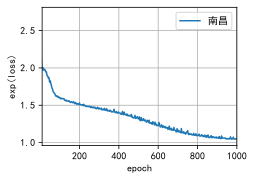

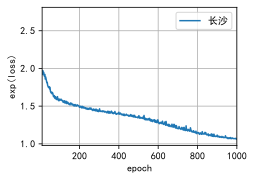

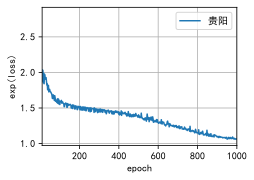

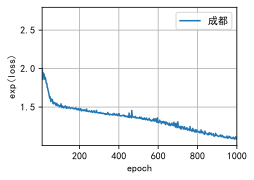

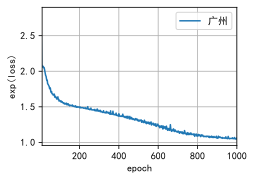

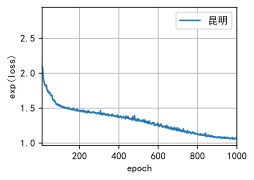

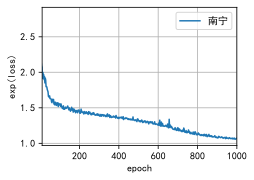

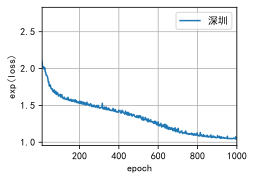

In [380]:
#file_path = '/home/dahai003/毕业设计/code/data/2014-2018上海-空气质量-气候.csv'
num_epochs, lr = 1000, 1
batch_size, num_steps = 10, 35
num_hiddens,num_layers, device = 512, 3,d2l.try_gpu()

count = 0
for city in cities:
    file_path = air_path+'2014-2018'+city+'-空气质量-气候.csv'
    print(file_path)
    #tran
    train_iter,test, dimension = load_data_air_quality(batch_size, num_steps,file_path=file_path)
    num_inputs = dimension
    lstm_layer = nn.LSTM(num_inputs, num_hiddens,num_layers)
    model = RNNModel(lstm_layer, dimension)
    model = model.to(device)
    train(model, train_iter, dimension, lr, num_epochs, device,city=city)
    torch.save(model.state_dict(), f'/home/dahai003/毕业设计/code/model/{city}512-3.params')
    #predict
#     prefix = test[-30:-15] #去若干天后的15天数据作为已知值
#     print(prefix.shape)
#     y = test[-15:] 
#     y_predict= predict(prefix,15,model,dimension,d2l.try_gpu())
#     y_predict = y_predict[-15:].reshape(-1,dimension)
#     offset = random.randint(0,90)
#     data30 = test[offset:offset+30] #去若干天后的15天数据作为已知值
#     prefix = data30[:-15]
#     print(prefix.shape)
#     y = data30[:]

#     y_predict= predict(prefix,15,model,dimension,d2l.try_gpu())
#     y_predict = y_predict[:].reshape(-1,dimension)



    
    

In [403]:
num_epochs, lr = 1000, 1
batch_size, num_steps = 10, 35
num_hiddens,num_layers, device = 512, 3,d2l.try_gpu()
MAPE = np.array([])
RMSE = np.array([])
count ,sumM=0,0
r = 100
for city in cities:
    file_path = air_path+'2014-2018'+city+'-空气质量-气候.csv'
    #load params to model
    train_iter,test, dimension = load_data_air_quality(batch_size, num_steps,file_path=file_path)
    num_inputs = dimension
    lstm_layer = nn.LSTM(num_inputs, num_hiddens,num_layers)
    model = RNNModel(lstm_layer, dimension)
    model.load_state_dict(torch.load(f'/home/dahai003/毕业设计/code/model/{city}512-3.params'))
    model.eval()
    model.to(device)
        #predict
    print(city)
    for j in range(6):
        for i in range(r):
            offset = random.randint(0,90)
            data30 = test[offset:offset+30] #去若干天后的15天数据作为已知值
            prefix = data30[:-15]
            y = data30[:]

            y_predict= predict(prefix,15,model,dimension,d2l.try_gpu())
            y_predict = y_predict[:].reshape(-1,dimension)
            y_predict_c = convert(file_path,y_predict)
            y_c = convert(file_path,y)

            if abs((y_predict_c[15][j] -y_c[15][j])/y_c[15][j]).sum() <0.45:
                count +=1
            sumM += np.sqrt(np.mean((y_c[15][j] - y_predict_c[15][j]) ** 2))
        sumM = sumM/r
        count = count/r
        MAPE = np.append(MAPE,count)
        RMSE = np.append(RMSE,sumM)
        sumM = 0
        count = 0
    

北京
上海
天津
重庆
哈尔滨
长春
沈阳
呼和浩特
石家庄
太原
西安
济南
乌鲁木齐
拉萨
西宁
兰州
银川
郑州
南京
武汉
杭州
合肥
福州
南昌
长沙


/tmp/ipykernel_12044/133479938.py:32: RuntimeWarning: divide by zero encountered in double_scalars
  if abs((y_predict_c[15][j] -y_c[15][j])/y_c[15][j]).sum() <0.45:


贵阳
成都
广州
昆明
南宁
深圳


In [415]:
df = pd.DataFrame(MAPE.reshape(-1,6), columns=['PM2.5', 'PM10', 'So2','No2','Co','O3'])
df.insert(0,'城市',cities)
df.to_csv('/home/dahai003/毕业设计/code/MAPE准确率.csv')
df

,城市,PM2.5,PM10,So2,No2,Co,O3
0,北京,0.40,0.60,0.44,0.64,0.54,0.74
1,上海,0.49,0.48,0.35,0.69,0.68,0.76
2,天津,0.39,0.53,0.79,0.68,0.64,0.79
3,重庆,0.66,0.71,0.71,0.89,0.89,0.37
4,哈尔滨,0.46,0.69,0.49,0.64,0.65,0.77
5,长春,0.30,0.29,0.24,0.62,0.62,0.50
6,沈阳,0.44,0.58,0.63,0.85,0.68,0.80
7,呼和浩特,0.53,0.56,0.49,0.65,0.85,0.55
8,石家庄,0.61,0.64,0.40,0.84,0.67,0.68
9,太原,0.32,0.56,0.19,0.75,0.53,0.48


In [416]:
df = pd.DataFrame(RMSE.reshape(-1,6), columns=['PM2.5', 'PM10', 'So2','No2','Co','O3'])
df.insert(0,'城市',cities)
df.to_csv('/home/dahai003/毕业设计/code/RMSE.csv')
df

,城市,PM2.5,PM10,So2,No2,Co,O3
0,北京,27.280068,34.566647,2.709142,17.081850,0.345580,9.652346
1,上海,18.236885,20.099798,3.582333,13.927632,0.196182,17.026518
2,天津,39.749696,39.378552,6.147718,16.717373,0.474600,9.342002
3,重庆,13.760282,22.024601,2.227181,8.399649,0.161015,13.663569
4,哈尔滨,16.017309,19.354042,6.676481,11.038242,0.275213,10.275740
5,长春,20.077078,37.074807,7.973097,12.050276,0.262905,16.513569
6,沈阳,15.323437,22.466711,8.704982,9.068799,0.264401,9.620056
7,呼和浩特,17.832715,46.419077,8.181517,14.923318,0.315305,15.024515
8,石家庄,25.485857,54.437695,12.186780,12.706557,0.400072,11.478481
9,太原,34.102749,63.681327,24.954276,16.219351,0.496758,18.998851
